<a href="https://colab.research.google.com/github/SonatonKumar/Python_project/blob/main/prediction_of_health_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
insurance_df=pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
mp.rcParams['figure.figsize']=(10,6)
mp.rcParams['font.size']=14
mp.rcParams['figure.titlesize']=18
mp.rcParams['figure.facecolor'] = '#00000000'

In [7]:
insurance_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [8]:
fig=px.histogram(insurance_df,x='age',title='Age Distribution', marginal='box', nbins=47)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig1=px.histogram(insurance_df,x='bmi',title='BMI distribution',color_discrete_sequence=['red'], marginal='box')
fig1.update_layout(bargap=0.1)
fig1.show()

In [10]:
fig2=px.histogram(insurance_df,x='charges',title='Annual medical charges',color='smoker',
                  color_discrete_sequence=['grey', 'blue'], marginal='box')
fig2.update_layout(bargap=0.1)
fig2.show()

In [11]:
fig3=px.histogram(insurance_df,x='smoker',color='sex')
fig3.update_layout(bargap=0.1)
fig3.show()
insurance_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [12]:
fig3=px.histogram(insurance_df,x='smoker',color='region')
fig3.update_layout(bargap=0.1)
fig3.show()

In [13]:
f=px.histogram(insurance_df,x='children',color='sex')
f.update_layout(bargap=0.1)
f.show()

In [14]:
fig4=px.scatter(insurance_df, x='age', y='charges', color='region',opacity=0.5, title='Age vs Charges',
                hover_data=['region'])
fig4.show()

In [15]:
f=px.scatter(insurance_df, x='age', y='charges',color='smoker')
f.update_traces(marker_size=5)
f.show()

In [16]:
f1=px.scatter(insurance_df, x='bmi', y='charges',color='smoker')
f1.update_traces(marker_size=5)
f1.show()

In [17]:
x=float(insurance_df.charges.corr(insurance_df.age))
x

0.2990081933306476

In [18]:
float(insurance_df.charges.corr(insurance_df.bmi))

0.19834096883362895

In [19]:
float(insurance_df.charges.corr(insurance_df.children))

0.06799822684790478

In [20]:
smoker_values={'yes':1,'no':0}
smoker_numeric=insurance_df.smoker.map(smoker_values)
float(insurance_df.charges.corr(smoker_numeric))

0.787251430498478

# **Setting Linear Regression **

In [21]:
non_smoker_df=insurance_df[insurance_df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [22]:
fg=px.scatter(non_smoker_df, x='age', y='charges')
fg.show()

In [23]:
smoker_values = {'no': 0, 'yes': 1}
sex_values={'male':0,'female':1}
region_values={'northeast':0,'northwest':1,'southeast':2,'southwest':3}
insurance_df.smoker= insurance_df.smoker.map(smoker_values)
insurance_df.sex=insurance_df.sex.map(sex_values)
insurance_df.region=insurance_df.region.map(region_values)
corr_mat=insurance_df.corr()
corr_mat

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,-0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [24]:
numeric_df=insurance_df.select_dtypes(include='number')
numeric_df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


Text(0.5, 1.0, 'Correlation matrix')

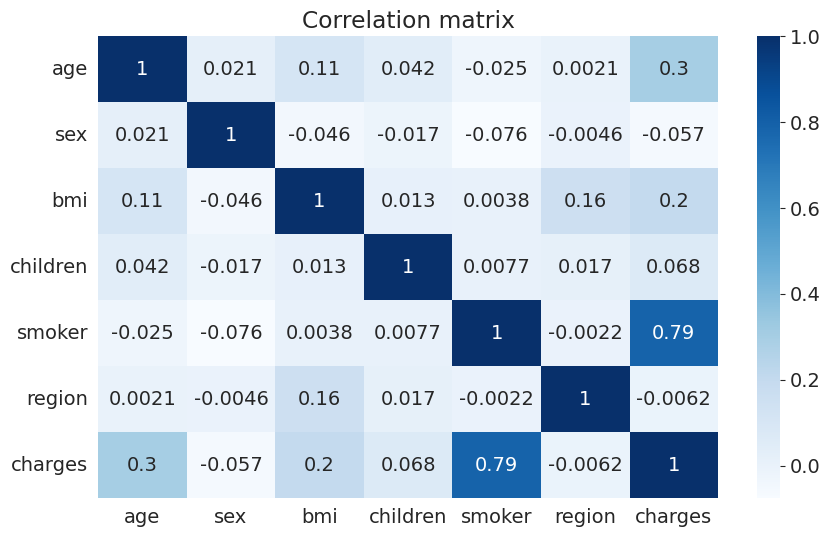

In [25]:
sns.heatmap(numeric_df.corr(),cmap='Blues',annot=True)
plt.title('Correlation matrix')

In [26]:
def predict_chrg(age,m,b):
    return m*age+b
import numpy as np

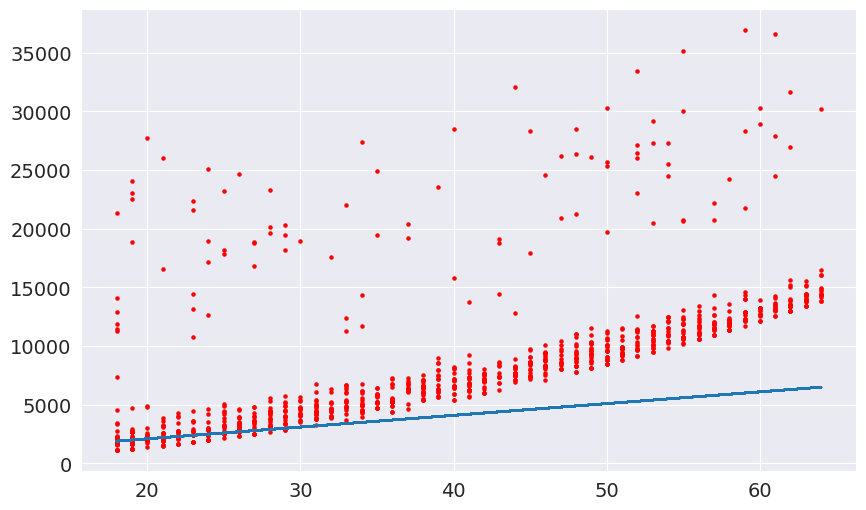

In [27]:
age=non_smoker_df.age
chrg=predict_chrg(age,100,100)
df=pd.DataFrame({'age':age,'predicted':chrg, 'actual':numeric_df.charges})
plt.scatter(df.age,df.actual, s=5, color='red')
plt.plot(df.age,df.predicted)

In [28]:
def try_params(m,b):
    age=non_smoker_df.age
    chrg=predict_chrg(age,m,b)
    df=pd.DataFrame({'age':age,'predicted':chrg, 'actual':numeric_df.charges})
    rmse=np.sqrt(np.mean((df.predicted-df.actual)**2))
    print(f"rmse={rmse}")
    plt.scatter(df.age,df.actual, s=5, color='red')
    plt.plot(df.age,df.predicted)

rmse=4745.860761807111


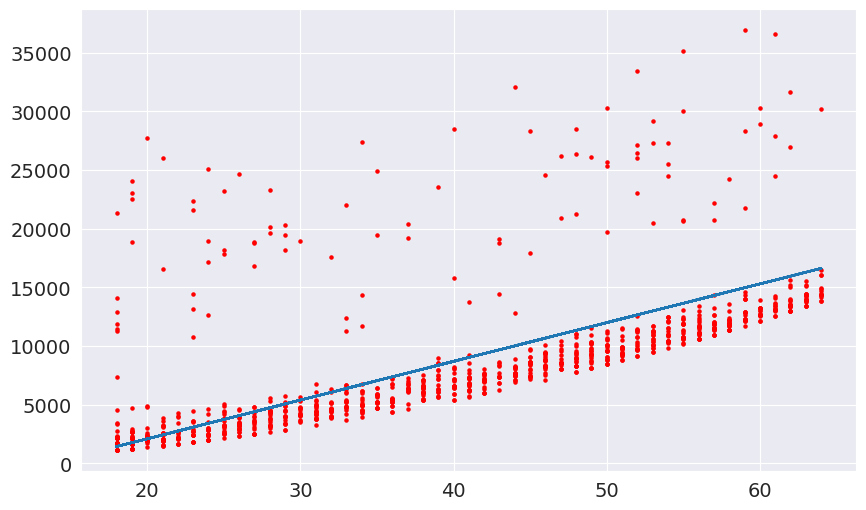

In [29]:
try_params(330,-4500)

# ***Model creation using SciKit learn***

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [46]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df['charges']
targets.shape

(1064,)

In [41]:
model.fit(inputs,targets)

LinearRegression()

In [44]:
model.predict(np.array([[30]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5926.04682837])

In [48]:
model.predict(pd.DataFrame([[30]], columns=['age']))

array([5926.04682837])

In [47]:
help(model.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [51]:
a=model.coef_
b=model.intercept_

rmse=4662.505766636395


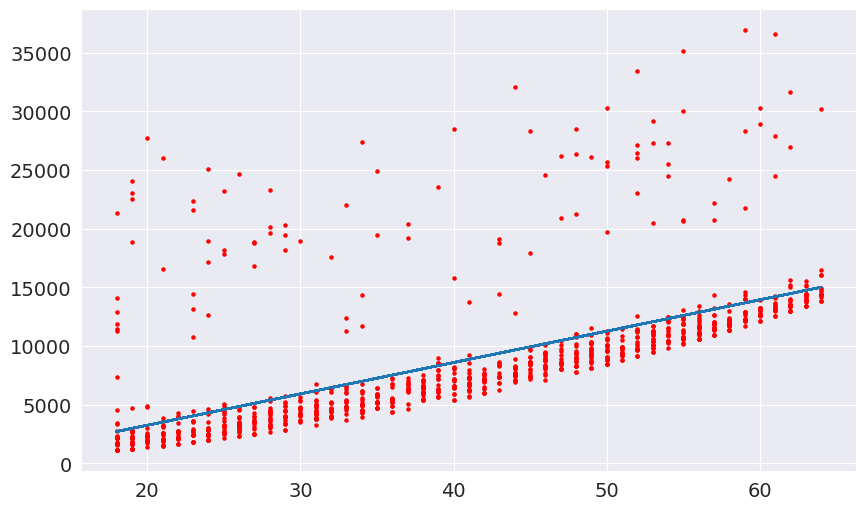

In [52]:
try_params(a,b)